# Chapter 13: More Music21Object Attributes and Properties

This section gets first into some more advanced things that Music21Objects have, then some more fun things

In [1]:
from music21 import *

## Sites and the storing of elements

In [2]:
n = note.Note()
s1 = stream.Stream(id='s1')
s2 = stream.Stream(id='s2')
s1.insert(10, n)
s2.insert(20, n)

for s in n.sites:
    print(s, s.elementOffset(n))

<music21.stream.Stream s1> 10.0
<music21.stream.Stream s2> 20.0


## Derivations

In [3]:
#  A Derivation object is a pointer to an object that this object is derived from in some way
c = note.Note('C4')
c.derivation

<Derivation of <music21.note.Note C> from None>

It starts from *None*. But we can create new notes from it.

In [4]:
f = c.transpose('P4')
f

<music21.note.Note F>

In [5]:
f.derivation

<Derivation of <music21.note.Note F> from <music21.note.Note C> via 'transpose'>

if *f* wants to do something to *c*, it can by changing itself and every element of its *.derivation.chain()*

In [6]:
f.notehead = 'diamond'
for n in f.derivation.chain():
    n.notehead = 'diamond'

(f.notehead, c.notehead)

('diamond', 'diamond')

## Context attributes

### *.measureNumber* which finds the *.number* value of the measure that an object is placed in

In [7]:
n = note.Note('C')
m = stream.Measure()
m.number = 7
m.append(n)
n.measureNumber

7

Without a context, you’ll get None

In [8]:
n3 = note.Note()
n3.measureNumber is None

True

### *.seconds* will calculate how many seconds the object lasts at that tempo

In [9]:
m.insert(0, tempo.MetronomeMark('Allegro', 120))
print (n.quarterLength, n.seconds)

1.0 0.5


you can change *.seconds* to reflect exact timing you might have from audio or MIDI data

In [10]:
n.seconds = 0.6
n.seconds

0.6

An object with no tempo information in its surrounding context returns the special ***nan*** meaning “not a number”

In [11]:
n3 = note.Note('E')
n3.seconds

nan

In [13]:
from math import isnan

for el in (n, n3):
    seconds = el.seconds
    if isnan(seconds):
        seconds = 'No information'
    print(el.step, seconds)

C 0.6
E No information


## Methods on Music21Objects

Unlike attributes，Methods tend to do more work and have more options, so they will always be called with () signs

### *.getOffsetBySite* and *.setOffsetBySite*

In [14]:
n = note.Note()
s1 = stream.Stream(id='s1')
s1.insert(10, n)
s2 = stream.Stream(id='s2')
s2.insert(20, n)
n.getOffsetBySite(s1)

10.0

In [15]:
n.setOffsetBySite(s1, 15.0)
n.getOffsetBySite(s1)

15.0

### *getContextByClass()*

In [17]:
# It finds the active element matching a certain class preceeding the element
bach = corpus.parse('bwv66.6')
lastNote = bach.recurse().getElementsByClass(note.Note).last()
lastNote

<music21.note.Note F#>

In [18]:
# What part is it in?
lastNote.getContextByClass(stream.Part)

<music21.stream.Part Bass>

In [19]:
# What was the Key at that moment?
lastNote.getContextByClass(key.KeySignature)

<music21.key.Key of f# minor>

In [20]:
# What is the TimeSignature at that moment?
lastNote.getContextByClass(meter.TimeSignature)

<music21.meter.TimeSignature 4/4>

It knows about the differences in different types of Streams.

In [21]:
gloria = corpus.parse('luca/gloria')
soprano = gloria.parts[0]

lastTimeSignature = None
for n in soprano.recurse().getElementsByClass(note.Note):
    thisTimeSignature = n.getContextByClass(meter.TimeSignature)
    if thisTimeSignature is not lastTimeSignature:
        lastTimeSignature = thisTimeSignature
        print(thisTimeSignature, n.measureNumber)

<music21.meter.TimeSignature 6/8> 1
<music21.meter.TimeSignature 2/4> 28
<music21.meter.TimeSignature 6/8> 80
<music21.meter.TimeSignature 3/4> 110


## Splitting methods

*.splitAtQuarterLength* – splits an object into two objects at the given quarter length


*.splitByQuarterLengths* – splits an object into two or more objects according to a list of quarter lengths


*.splitAtDurations* – takes an object with a complex duration (such as 5.0 quarters) and splits it into notatable units

In [22]:
n = note.Note('C#5')
n.duration.type = 'whole'
n.articulations = [articulations.Staccato(), articulations.Accent()]
# articulation 演奏法
n.lyric = 'hi!'
n.expressions = [expressions.Mordent(), expressions.Trill(), expressions.Fermata()]
# Mordent 波音； Trill 颤音； Fermata 研音记号
n.show('xml')

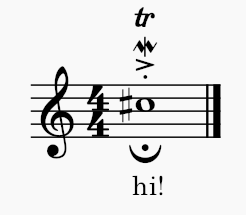

Now let’s split this note just before beat 4

In [23]:
splitTuple = n.splitAtQuarterLength(3.0)
s = stream.Stream()
s.append(splitTuple)
s.show('xml')

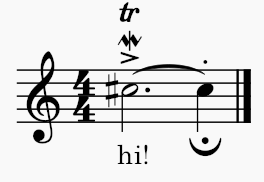